## Useful tricks vol. 5 - SVMs

### Advantages
- able to create complex decision boundaries
- work well for low-dim and high-dim. data

### Disadvantages
- works poorly if the features are not scaled (are of different orders of mangitude)
- required careful tuning of parameters
- \>~100k examples might be computationally costly

#### When to use
Powerful for medium-sized datasets of features with similar meaning. Require
scaling of data, sensitive to parameters

## Visualize the decision boundary and support vectors

In [2]:
import mglearn
from sklearn.svm import SVC
import numpy as np
X, y = mglearn.tools.make_handcrafted_dataset()

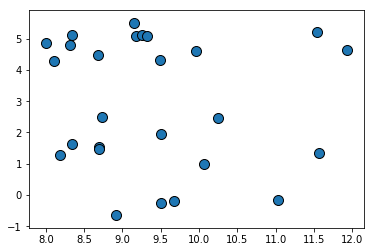

In [3]:
mglearn.discrete_scatter(X[:, 0], X[:, 1])

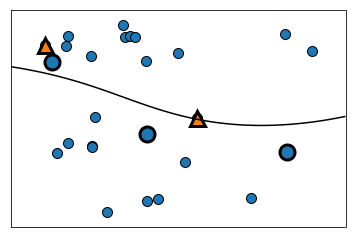

In [4]:
from sklearn.svm import SVC
# gamma controls width of the kernel, C limits the importance of each point
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X,y)
mglearn.discrete_scatter(X[:, 0], X[:, 1])
mglearn.plots.plot_2d_separator(svm, X, eps=0.5)
sv = svm.support_vectors_
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)

Has these cool attributes:

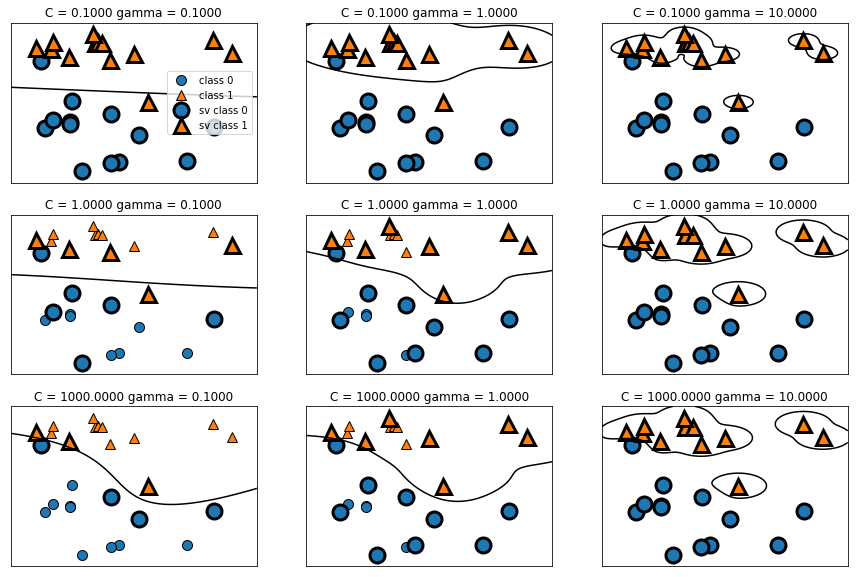

In [6]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(3,3, figsize=(15, 10))
for ax, C in zip(axes, [-1,0,3]):
    for a, gamma in zip(ax, range(-1,2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
axes[0,0].legend(["class 0", "class 1","sv class 0","sv class 1"])

- **gamma** - small: large radius for the kernel = smooth decision boundary - low complexity
- **C** - small: a single data point has very limited influence on the decision boundary

In [8]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

bc_dataset = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(bc_dataset.data, bc_dataset.target)

svc = SVC()
svc.fit(X_train, y_train)
print(f"train score: {svc.score(X_train, y_train)}, test score: {svc.score(X_test, y_test)}")

train score: 1.0, test score: 0.5804195804195804


C:\Users\terez\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


The test score is so poor because the features are of different orders of magnitude.
- solution: by hand, MinMaxScaler()

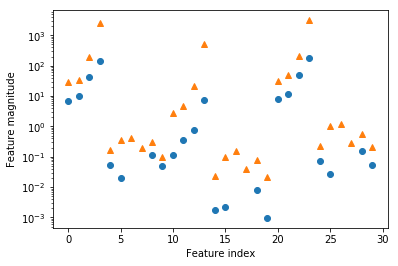

In [9]:
plt.plot(X_train.min(axis=0), 'o', label='min')
plt.plot(X_train.max(axis=0), '^', label='max')
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")
plt.yscale("log")

In [30]:
# solving the scaling issue 'by hand'
min_training = X_train.min(axis=0)
range_training = (X_train - min_training).max(axis=0)
X_train_scaled = (X_train - min_training) / range_training

min_testing = X_test.min(axis=0)
range_testing = (X_test - min_testing).max(axis=0)
X_test_scaled = (X_test - min_testing) / range_testing

print(f"{X_train_scaled.max()}, {X_train_scaled.min()}")
print(f"{X_test_scaled.max()}, {X_test_scaled.min()}")

svc = SVC()
svc.fit(X_train_scaled, y_train)
print(f"[After scaling]: train score: {svc.score(X_train_scaled, y_train)}, test score: {svc.score(X_test_scaled, y_test)}")

# solving the scaling issue with sklearn's preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svc = SVC()
svc.fit(X_train_scaled, y_train)
print(f"[After scaling with sklearn]: train score: {svc.score(X_train_scaled, y_train)}, test score: {svc.score(X_test_scaled, y_test)}")

1.0, 0.0
1.0, 0.0
[After scaling]: train score: 0.9460093896713615, test score: 0.916083916083916
[After scaling with sklearn]: train score: 0.9460093896713615, test score: 0.965034965034965


C:\Users\terez\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\terez\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


We went from ~.56 to ~.91 in testing accuracy = the impact of scaling only!

In [29]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)
print(f"[After scaling with proper C setting]: train score: {svc.score(X_train_scaled, y_train)}, test score: {svc.score(X_test_scaled, y_test)}")

[After scaling with proper C setting]: train score: 0.9882629107981221, test score: 0.9370629370629371


C:\Users\terez\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
